# Hello Graph World

This notebook will focus on creating the nodes and edges for a basic graph, such as the Krackhardt kite. Our data of choice will be using Disney+ streaming service of their movies and TV Shows where we can look into the relationship of directors and the cast. The data can be acquired from Kaggle [here](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows/data). 

<div>
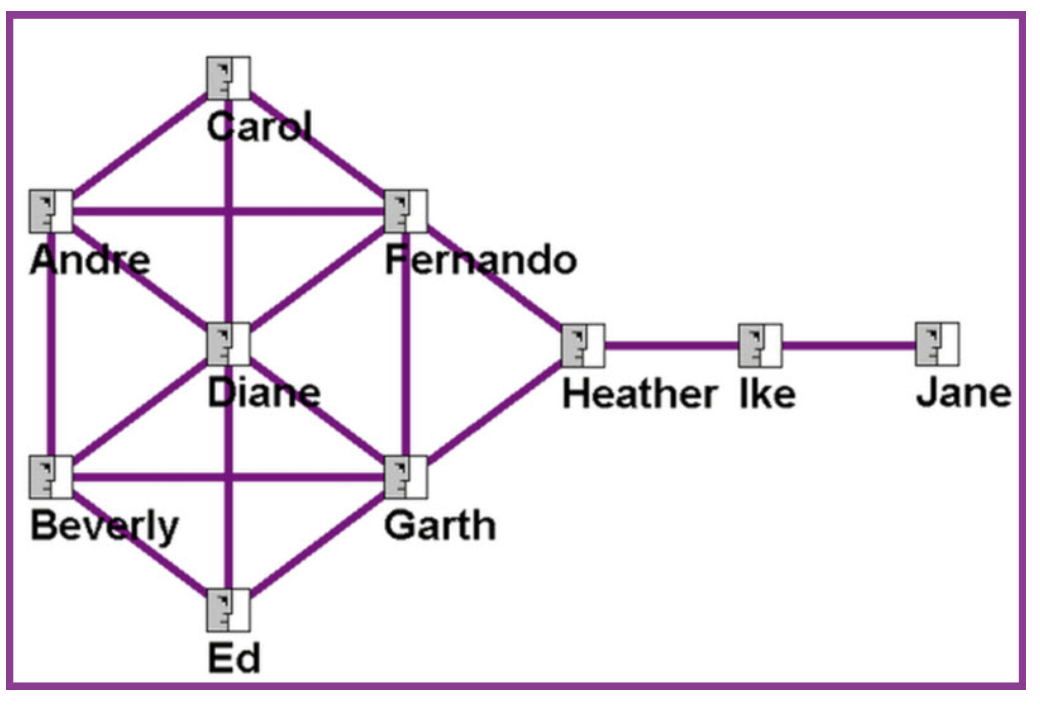
</div>

## Import Packages

In [16]:
## Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Import Data File

The data is stored in a CSV file and brought in using pandas. Since the only columns of importance for this analysis are **director**, **cast**, and **listed_in**, we will create a DataFrame that only contains these fields while also renaming the **listed_in** to a more suitable name like **genre**.

In [17]:
## Import Dataset
df = pd.read_csv('disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [18]:
director_genre_df = df[['director', 'cast', 'listed_in']]
director_genre_df = director_genre_df.rename(columns = {'listed_in':'genre'})

director_genre_df.head()

,director,cast,genre
0,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","Animation, Family"
1,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Comedy
2,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","Animation, Comedy, Family"
3,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Musical
4,NaN,"John Lennon, Paul McCartney, George Harrison, ...","Docuseries, Historical, Music"


## Data Wrangling 

We notice that our data of particular importance such as **director**, **cast**, and **genre** are long strings that need to be parsed down into a list format. To achieve this, using the *str.split()* function will split these long strings based on the comma (,) delimeter. 

In [19]:
director_genre_df['director'] = director_genre_df['director'].str.split(", ")
director_genre_df['cast'] = director_genre_df['cast'].str.split(", ")
director_genre_df['genre'] = director_genre_df['genre'].str.split(", ")
director_genre_df

,director,cast,genre
0,"[Alonso Ramirez Ramos, Dave Wasson]","[Chris Diamantopoulos, Tony Anselmo, Tress Mac...","[Animation, Family]"
1,[John Cherry],"[Jim Varney, Noelle Parker, Douglas Seale]",[Comedy]
2,[Karen Disher],"[Raymond Albert Romano, John Leguizamo, Denis ...","[Animation, Comedy, Family]"
3,[Hamish Hamilton],"[Darren Criss, Adam Lambert, Derek Hough, Alex...",[Musical]
4,NaN,"[John Lennon, Paul McCartney, George Harrison,...","[Docuseries, Historical, Music]"
...,...,...,...
1445,[Gavin Hood],"[Hugh Jackman, Liev Schreiber, Danny Huston, w...","[Action-Adventure, Family, Science Fiction]"
1446,[Shawn Levy],"[Ben Stiller, Amy Adams, Owen Wilson, Hank Aza...","[Action-Adventure, Comedy, Family]"
1447,[Dexter Fletcher],"[Tom Costello, Jo Hartley, Keith Allen, Dickon...","[Biographical, Comedy, Drama]"
1448,[Gurinder Chadha],"[Parminder Nagra, Keira Knightley, Jonathan Rh...","[Buddy, Comedy, Coming of Age]"


Now that they are neatly store in lists, we can used pandas *explode()* function to break down these lists into a long format that shows each relationship between the **director**, **cast**, and **genre** fields. 

In [20]:
explode_df = director_genre_df.explode(['director'])
explode_df = explode_df.explode(['cast'])
explode_df = explode_df.explode(['genre'])
explode_df.head()

,director,cast,genre
0,Alonso Ramirez Ramos,Chris Diamantopoulos,Animation
0,Alonso Ramirez Ramos,Chris Diamantopoulos,Family
0,Alonso Ramirez Ramos,Tony Anselmo,Animation
0,Alonso Ramirez Ramos,Tony Anselmo,Family
0,Alonso Ramirez Ramos,Tress MacNeille,Animation


## NetworkX

The networkx package allows us to take this pandas format and create a new graph based on the **director** and **cast** relationship using the *from_pandas_edgelist()* function. For more information and additional example, you can check their documentation [here](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html).

In [28]:
G = nx.from_pandas_edgelist(explode_df, "director", "cast")

### Random Layout

We can see all the connections between directors and cast members, while keeping their labels off as it would clutter up the graph

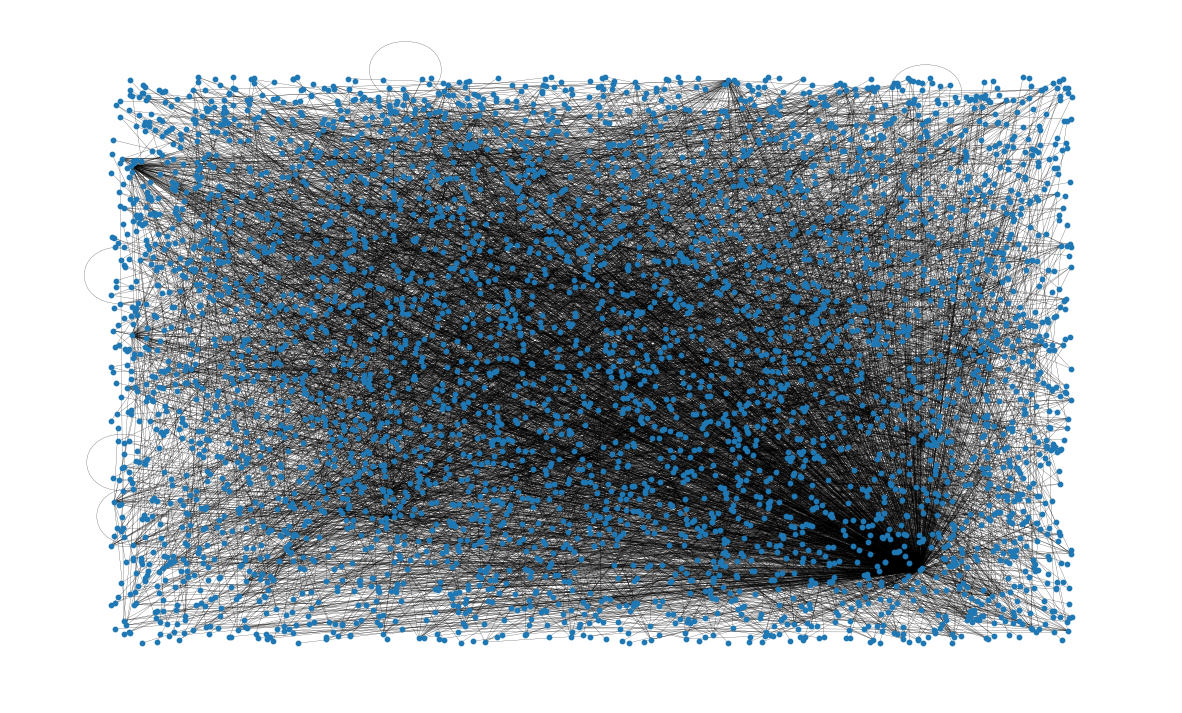

In [30]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

However, it's quite busy and not as informative in its current state. Let's first maybe focus on a specific genre such as "Superhero". This is better than before and we begin to see some nodes having more edges than others.

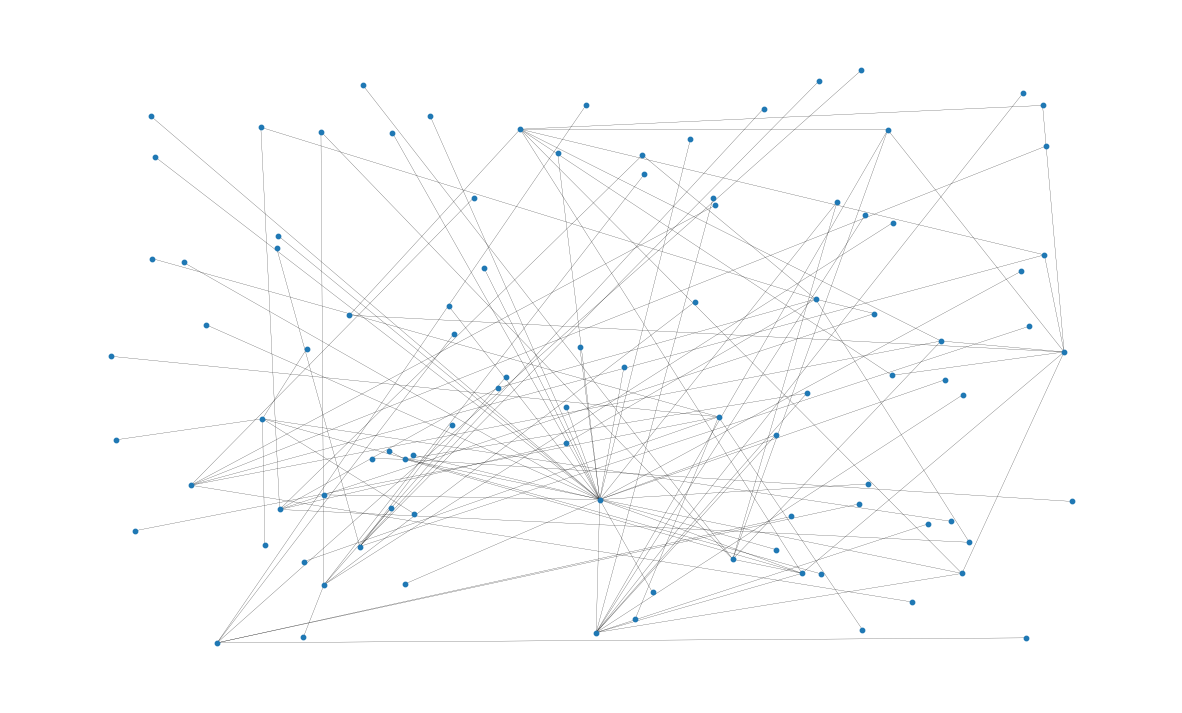

In [32]:
genre_df = explode_df[explode_df['genre'].isin(['Superhero'])]

G = nx.from_pandas_edgelist(genre_df, "director", "cast")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

### Spring Layout

The problem with *random_layout()*, is that we cannot control reproducibility. Instead, *spring_layout()* allows us to set a seed so that the graph can stay consistent. What it also does is show us how these connections are exactly connected properly with their edges and how some of the nodes of importance are more clustered on their own compared to before. 

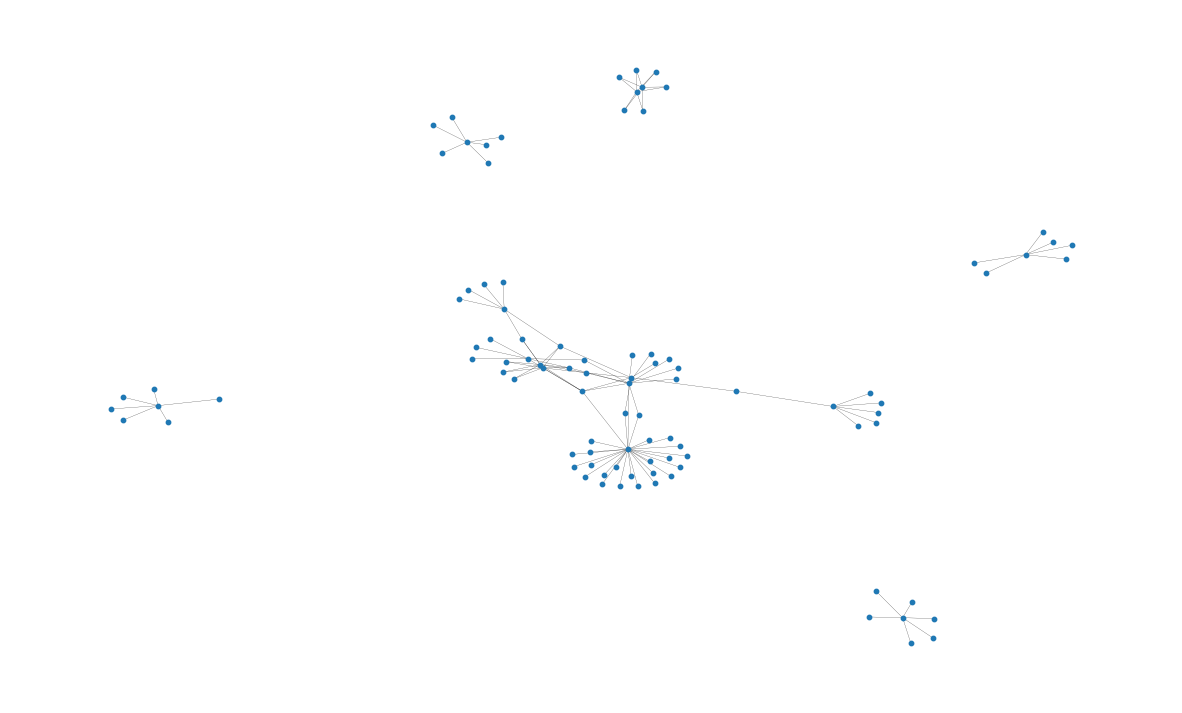

In [33]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

nx.draw_networkx(G, pos=nx.spring_layout(G, seed=123), ax=ax, **plot_options)

Trying to add labels in becomes cluttered still and requires more research on how to make a better graph than this. 

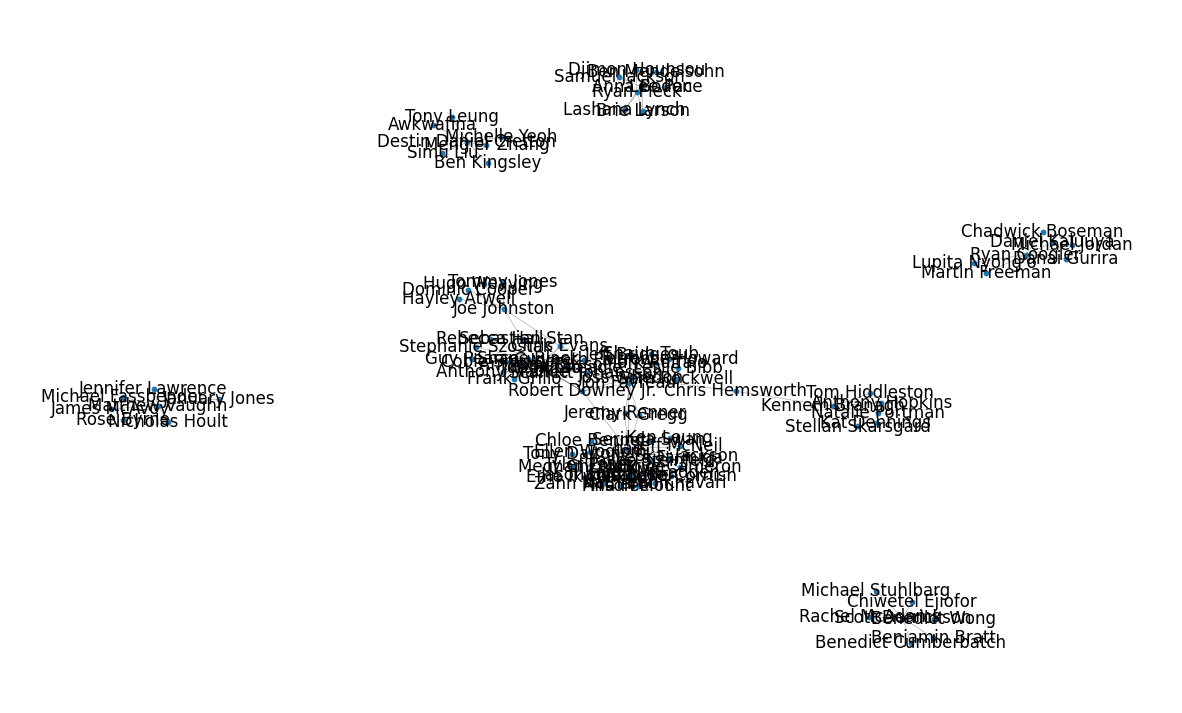

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}

nx.draw_networkx(G, pos=nx.spring_layout(G, seed=123), ax=ax, **plot_options)

### Bipartite Layout

Another interesting layout we explored was *bipartite_layout()*. However, this layout is not ideal because **nodes should not connect within the same group**, making it less suitable for our data. For example, multiple directors may work on the same TV show or movie, meaning our edges do not have a strict separation between the two node groups.

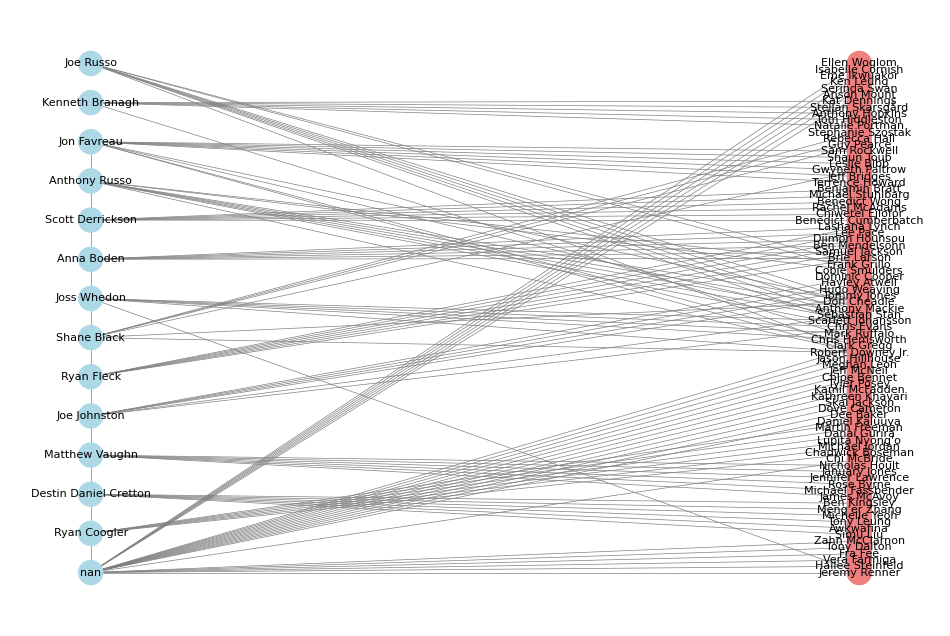

In [40]:
G = nx.from_pandas_edgelist(genre_df, "director", "cast")

directors = set(genre_df["director"])
cast = set(genre_df["cast"])

color_map = ["lightblue" if node in directors else "lightcoral" for node in G.nodes]

pos = nx.bipartite_layout(G, directors)

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")

nx.draw(
    G, 
    pos, 
    ax=ax, 
    node_color=color_map, 
    edge_color="gray",
    node_size=300, 
    with_labels=True,
    font_size=8, 
    width=0.5
)
plt.show()

## Conclusion

We have demonstrated how to transform our data from pandas into different formats to display a network. However, there is still much more to explore, even simple tasks like labeling nodes can be done more effectively. With further research, we can use techniques such as centrality measurements to identify and label the most important nodes while ignoring less significant ones on the fringes of the graph.